<a href="https://colab.research.google.com/github/buddercakes/skills-introduction-to-github/blob/main/numerical%20methods%20basics%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp


In [ ]:
def decimal_to_binary(n, precision=10):
    if n == 0:
        return "0"

    negative = n < 0
    n = abs(n)

    integer_part = int(n)
    fractional_part = n - integer_part
    binary_integer = ""

    if integer_part == 0:
        binary_integer = "0"
    else:
        while integer_part > 0:
            binary_integer = str(integer_part % 2) + binary_integer
            integer_part //= 2

    # Convert fractional part
    binary_fraction = ""
    while fractional_part > 0 and len(binary_fraction) < precision:
        fractional_part *= 2
        bit = int(fractional_part)
        binary_fraction += str(bit)
        fractional_part -= bit

    # Combine integer and fractional parts
    binary_result = binary_integer
    if binary_fraction:
        binary_result += "." + binary_fraction

    return "-" + binary_result if negative else binary_result

print(decimal_to_binary(1/24,11))



0.00001010101


To convert 1/24 to binary, the decimal form of the fraction is used 0.0416666667, this is then divided into a real part containing the integer portion of the number (either a zero or a one) and a fractional part. The integer part is kept as the first digit of the binary decimal and the fractional part contains everything after the decimal. This is then multiplied by 2 and the process is repeated, adding a 0 or 1 to the binary number. This process is repeated until there is a repeating sequence or till the desired length of the mantissa. In this case the mantisa is 0.1010 and the binary number is 0.1010101 x 2^-4.

This code was generated using ChatGPT with the prompt: "Write a python function that can take any number and convert it from base 10 to base 2. please include floating-point values."

In this code, a function "decimal_to_binary" is defined with an input of desired base 10 number and the precision to which it needs to be converted. If the number input is 0, the function stops and outputs zero.
Else, it checks to see if the number is negative, creates a variable negative to store this boolean, and takes the absolute value for the math to work. It then converts the integer part of the decimal, checks for 0 to prevent errors, if 0 stores that as the integer part, if not it will continue successive divisions by two and storing the modulus. Then if there is float, the function continues in the process described above until the variable "binary_fraction" is the length of the input precision.   

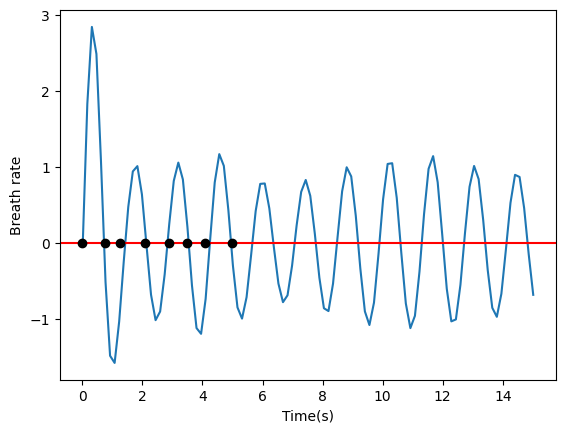

In [ ]:
#original code
data = sp.io.loadmat('ratrecord.mat')
t = data['t']
data = data['data']

import matplotlib.pyplot as plt

plt.plot(t[0],data[0])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Time(s)")
plt.ylabel("Breath rate")

xguesses = [0, 1.25,0.75,2.1,2.9,3.5,4.1,5]
yguesses = np.zeros(len(xguesses))
plt.plot(xguesses,yguesses,color ='k', linestyle = 'None', marker ='o')
plt.show()

In [ ]:
import time
def timeloc(target,times):
  loc = np.argmin(np.abs(times-target))
  times = times.flatten()
  return loc

a = 2.0
b = 2.2
eps = 0.1
xeps = 0.1
maxval = 100

In [ ]:
#Bisection
data = data.flatten()

cb = np.zeros(maxval)
bval = np.zeros(maxval)

leftval = data[timeloc(a,t[0])]
rightval = data[timeloc(b,t[0])]
start = time.time()
print("left = ", leftval,"right = ",rightval)
if leftval*rightval < 0:
  print("All good continue")
else:
  print("Nope, try again")


for i in range(maxval):
    leftval = data[timeloc(a,t[0])]
    rightval = data[timeloc(b,t[0])]

    cb[i] = (a+b)/2
    bval[i] = data[timeloc(cb[i],t)]
    print(f"Step {i + 1}: a={a}, b={b}, cb={cb[i]}, f(cb)={bval[i]}")
    if abs(bval[i]) < 1e-6 or (b-a)/2 < 1e-6:
      print("convergence criteria met")
      break
    if leftval * bval[i] < 0:
      b = cb[i]
    else:
      a = cb[i]

btime = time.time()-start
print(f"Time duration: {btime:.6f} seconds")
print(f"Approximate zero found at t = {cb[i]:.6f}")
print(f"Breathing value: {bval[i]:.6f}")
print(f"Bisection method took {i+1} iterations")


left =  0.6439127371612619 right =  -0.02306854315756397
All good continue
Step 1: a=2.0604344542279414, b=2.060646563782954, cb=2.0605405090054476, f(cb)=-0.02306854315756397
Step 2: a=2.0604344542279414, b=2.0605405090054476, cb=2.0604874816166943, f(cb)=-0.02306854315756397
Step 3: a=2.0604344542279414, b=2.0604874816166943, cb=2.060460967922318, f(cb)=-0.02306854315756397
Step 4: a=2.0604344542279414, b=2.060460967922318, cb=2.0604477110751294, f(cb)=0.6439127371612619
Step 5: a=2.0604477110751294, b=2.060460967922318, cb=2.0604543394987234, f(cb)=0.6439127371612619
Step 6: a=2.0604543394987234, b=2.060460967922318, cb=2.060457653710521, f(cb)=-0.02306854315756397
Step 7: a=2.0604543394987234, b=2.060457653710521, cb=2.060455996604622, f(cb)=-0.02306854315756397
Step 8: a=2.0604543394987234, b=2.060455996604622, cb=2.0604551680516727, f(cb)=-0.02306854315756397
convergence criteria met
Time duration: 0.009372 seconds
Approximate zero found at t = 2.060455
Breathing value: -0.023069

**left =  0.6439127371612619 right =  -0.02306854315756397

All good continue
convergence criteria met

Time duration: 0.009372 seconds

Approximate zero found at t = 2.060455

Breathing value: -0.023069

Bisection method took 8 iterations**

In [ ]:
cfp = np.zeros(maxval)
fpval = np.zeros(maxval)
a = 2.0
b = 2.2
leftval = data[timeloc(a,t[0])]
rightval = data[timeloc(b,t[0])]
start = time.time()

print("left = ", leftval,"right = ",rightval)
if leftval*rightval < 0:
  print("All good continue")
else:
  print("Nope, try again")

for i in range(maxval):
  leftval = data[timeloc(a,t[0])]
  rightval = data[timeloc(b,t[0])]
  cfp[i]= (a*rightval - b*leftval)/(rightval-leftval)
  fpval[i] = data[timeloc(cfp[i],t)]
  #print(f"Step {i + 1}: a={a}, b={b}, cfp={cfp[i]}, f(cfp)={fpval[i]}")
  if abs(fpval[i]) < 1e-6 or abs(b-a)/2 < 1e-6:
    print("convergence criteria met")
    break
  if leftval * fpval[i] < 0:
    b = cfp[i]
  else:
    a = cfp[i]
fptime = time.time()-start
print(f"Time duration: {fptime:.6f} seconds")
print(f"Approximate zero found at t = {cfp[i]:.6f}")
print(f"Breathing value: {fpval[i]:.6f}")
print(f"Steps taken 34")

left =  0.6439127371612619 right =  -0.02306854315756397
All good continue
Time duration: 0.006781 seconds
Approximate zero found at t = 2.060647
Breathing value: -0.023069
Steps taken 34


**left =  0.6439127371612619 right =  -0.02306854315756397

All good continue

Time duration: 0.006781 seconds

Approximate zero found at t = 2.060647

Breathing value: -0.023069

Steps taken 34**